# Hamiltonian systems

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from phase_space_plotting import plot_field, plot_traj, plot_phase_portrait

## Hamiltonian systems in the plane

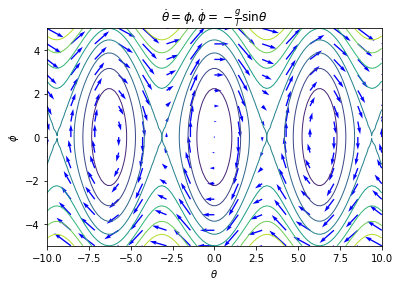

In [3]:
theta = np.linspace(-10, 10, 100)
phi = np.linspace(-5, 5, 100)
xlim = theta.min(), theta.max()
ylim = phi.min(), phi.max()
def dx_dt(x, t):
    return [x[1], -5*np.sin(x[0])]

THETA, PHI = np.meshgrid(theta, phi)
H = PHI**2 / 2 - 5 * np.cos(THETA)

plt.contour(THETA, PHI, H, 10, linewidths=1)
plot_field(dx_dt, xlim, ylim, scale=100)

plt.title(r'$\dot{\theta} = \phi, \dot{\phi} = -\frac{g}{l}\sin\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\phi$')
plt.show()

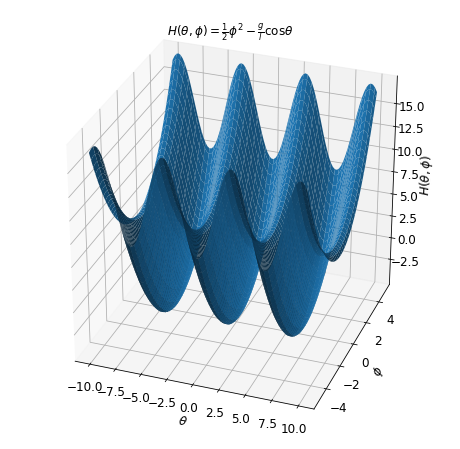

In [4]:
def fun(x, y):
    return y**2 / 2 - 5*np.cos(x)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
zs = np.array([fun(x,y) for x, y in zip(np.ravel(THETA), np.ravel(PHI))])
H = zs.reshape(THETA.shape)

ax.plot_surface(THETA, PHI, H)

ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\phi$', fontsize=12)
ax.set_zlabel(r'$H(\theta,\phi)$', fontsize=12)
plt.tick_params(labelsize=12)
ax.view_init(30, -70)
ax.set_title(r'$H(\theta, \phi) = \frac{1}{2}\phi^2 - \frac{g}{l}\cos\theta$')

plt.show()

### Phase portrait can be derived from countours

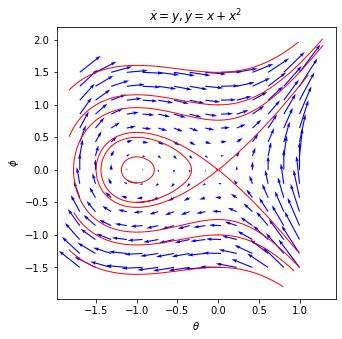

In [5]:
x = np.linspace(-1.7, 1, 100)
y = np.linspace(-1.5, 1.5, 100)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

def dx_dt(x, t):
    return [x[1], x[0] + x[0]**2]

plt.figure(figsize=(5, 5))
plot_traj([1, -1.5], dx_dt, fw=7)
plot_traj([-1, -0.2], dx_dt, fw=7)
plot_traj([-1, -0.5], dx_dt, bw=8)
plot_traj([0.01, 0], dx_dt, fw=5.1, bw=5)
plot_traj([-0.01, 0], dx_dt, bw=15)
plot_traj([0, 1], dx_dt, fw=1, bw=1.8)
plot_traj([0, 1.5], dx_dt, fw=0.6, bw=1.2)
plot_traj([0, -1], dx_dt, fw=1.7, bw=0.8)
plot_traj([0, -1.5], dx_dt, fw=1.2, bw=0.5)

plot_field(dx_dt, xlim, ylim, scale=20)

plt.title(r'$\dot{x} = y, \dot{y} = x + x^2$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\phi$')
plt.show()

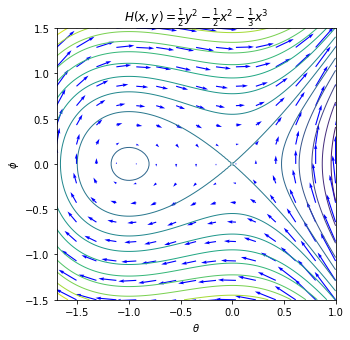

In [6]:
x = np.linspace(-1.7, 1, 100)
y = np.linspace(-1.5, 1.5, 100)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

def dx_dt(x, t):
    return [x[1], x[0] + x[0]**2]

X, Y = np.meshgrid(x, y)
H = 1/2*Y**2 - 1/2*X**2 - 1/3*X**3

plt.figure(figsize=(5, 5))
plt.contour(X, Y, H, 20, linewidths=1)
plot_field(dx_dt, xlim, ylim, scale=20)

plt.title(r'$H(x, y) = \frac{1}{2}y^2 - \frac{1}{2}x^2 - \frac{1}{3}x^3$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\phi$')
plt.show()

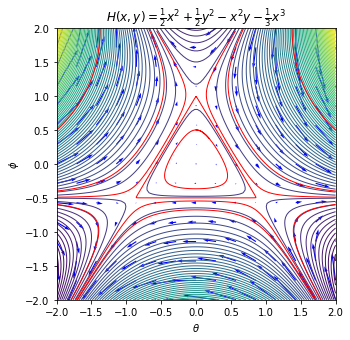

In [7]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

def dx_dt(x, t):
    return [x[1] + x[0]**2 - x[1]**2, -x[0] - 2*x[0]*x[1]]

X, Y = np.meshgrid(x, y)
H = Y*X**2 + 1/2*Y**2 - 1/3*Y**3 + 1/2*X**2

plt.figure(figsize=(5, 5))
plt.contour(X, Y, H, 100, linewidths=1)
plot_field(dx_dt, xlim, ylim, scale=50)

plot_traj([0, 0.5], dx_dt, fw=8)
plot_traj([0, 0.99], dx_dt, fw=20)

plot_traj([2, 0.5], dx_dt, bw=0.285)
plot_traj([2, -0.4], dx_dt, bw=1.87)
plot_traj([2, -0.49], dx_dt, bw=4.5)

plot_traj([-2, 0.5], dx_dt, fw=0.285)
plot_traj([-2, -0.4], dx_dt, fw=1.87)
plot_traj([-2, -0.49], dx_dt, fw=4.5)

plot_traj([-1.7, -2], dx_dt, bw=2.85)
plot_traj([-1.725, -2], dx_dt, bw=4.63)
plot_traj([-1.79, -2], dx_dt, bw=0.88)
plot_traj([1.79, -2], dx_dt, fw=0.88)

plt.title(r'$H(x, y) = \frac{1}{2}x^2 + \frac{1}{2}y^2 - x^2y - \frac{1}{3}x^3$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\phi$')
plt.show()

## Lyapunov functions and stability

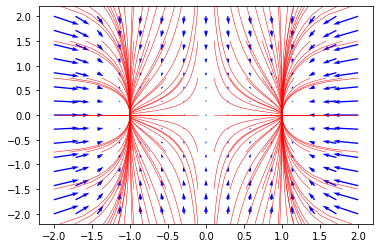

In [28]:
def dx_dt(x, t):
    return [x[0] - x[0]**3, -x[1]]
N = 2
xlim = (-N, N)
ylim = (-N, N)
plot_phase_portrait(
    dx_dt, 
    np.linspace(0, 10, 100), 
    xlim=xlim, 
    ylim=ylim, 
    ic_x=np.linspace(*[-2, 2], 20), 
    scale=80, 
    linewidth=0.5)

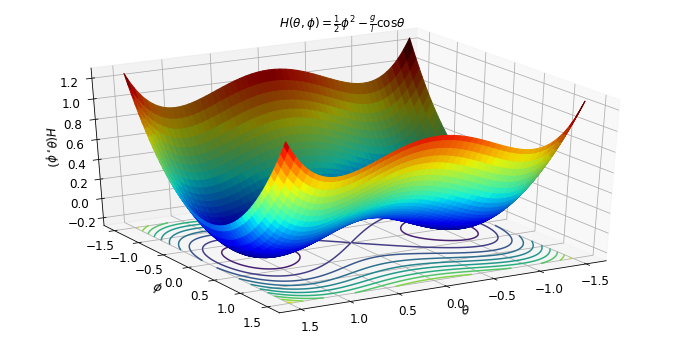

In [90]:
def fun(x, y):
    return -1/2*x**2 + 1/2*y**2 + 1/4*x**4

x, y = 2*[np.linspace(-1.5, 1.5, 100)]
X, Y = np.meshgrid(x, y)
V = fun(X, Y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
zs = np.array([fun(x,y) for x, y in zip(np.ravel(X), np.ravel(Y))])
V = zs.reshape(X.shape)

colors = cm.jet((V - V.min()) / (V.max() - V.min()))
ax.plot_surface(X, Y, V, facecolors=colors)
ax.contour(X, Y, V, 10, offset=-0.28)

ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\phi$', fontsize=12)
ax.set_zlabel(r'$H(\theta,\phi)$', fontsize=12)
plt.tick_params(labelsize=12)
ax.view_init(30, 60)
ax.set_title(r'$H(\theta, \phi) = \frac{1}{2}\phi^2 - \frac{g}{l}\cos\theta$')

plt.show()

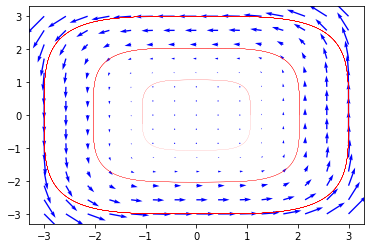

In [116]:
def dx_dt(x, t):
    return [-x[1]**3, x[0]**3]
N = 3
xlim = (-N, N)
ylim = (-N, N)
plot_phase_portrait(
    dx_dt, 
    np.linspace(0, 10, 1000), 
    xlim=xlim, 
    ylim=ylim,  
    scale=500,
    ic_x=np.linspace(0.1, 3, 4),
    ic_y=[0],
    linewidth=0.1)